In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Social_Network_Ads.csv']


**Importing Libraries **

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Dataset **

In [3]:
dataset = pd.read_csv('../input/Social_Network_Ads.csv')

**Getting the information related to Dataset**

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [5]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
dataset.describe(include = ['O'])

,Gender
count,400
unique,2
top,Female
freq,204


In [7]:
dataset['Gender'] = dataset['Gender'].map({'Male':1,'Female':0})

In [8]:
x = dataset.iloc[:,1:4]
y = dataset.iloc[:,4:]

**Normalising...**

In [9]:
def normalise(x):
    return ((x - np.min(x))/(np.max(x)-np.min(x)))

x.iloc[:,2:] = x.iloc[:,2:].apply(normalise)

**Seperating in training and testing set**

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=100)

**Logistic Regression**

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


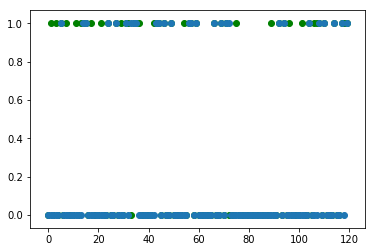

In [12]:
c = [i for i in range(120)]
plt.figure()
plt.scatter(c,y_test,color='green',label='original')
plt.scatter(c,y_pred_lr)

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_lr)
cm

array([[73,  2],
       [19, 26]])

21 wrong predictions out of total 120 test values

**K Nearest Neighbors**

In [14]:
from sklearn.neighbors import KNeighborsClassifier
lr_knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
lr_knn.fit(x_train,y_train)
y_pred_knn = lr_knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred_knn)
cm

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([[69,  6],
       [12, 33]])

18 wrong predictions out of total 120 total predictions...

**Support Vector Algorithm**

In [15]:
from sklearn.svm import SVC
lr_svc = SVC(kernel='linear',random_state=0)
lr_svc.fit(x_train,y_train)
y_pred_svc = lr_svc.predict(x_test)
cm = confusion_matrix(y_test,y_pred_svc)
cm

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[72,  3],
       [18, 27]])

21 Wrong predictions...

**Kernel SVM**

In [16]:
from sklearn.svm import SVC
lr_ksvc = SVC(kernel = 'rbf')
lr_ksvc.fit(x_train,y_train)
y_pred_ksvc = lr_ksvc.predict(x_test)
cm = confusion_matrix(y_test, y_pred_ksvc)
cm

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[72,  3],
       [14, 31]])

17 wrong predictions...

**Naive_bayes Algorithm **

In [17]:
from sklearn.naive_bayes import GaussianNB
lr_nb = GaussianNB()
lr_nb.fit(x_train,y_train)
y_pred_nb = lr_nb.predict(x_test)
cm = confusion_matrix(y_test,y_pred_nb)
cm

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[72,  3],
       [13, 32]])

16 wrong predictions...

**Decision tree classifier**

In [18]:
from sklearn.tree import DecisionTreeClassifier
lr_dtc = DecisionTreeClassifier()
lr_dtc.fit(x_train,y_train)
y_pred_dtc = lr_dtc.predict(x_test)
cm = confusion_matrix(y_test,y_pred_dtc)
cm

array([[72,  3],
       [12, 33]])

15 wrong predictions ... 

**Random Forest Classifier**

In [19]:
from sklearn.ensemble import RandomForestClassifier
lr_rfc = RandomForestClassifier()
lr_rfc.fit(x_train,y_train)
y_pred_rfc = lr_rfc.predict(x_test)
cm = confusion_matrix(y_test,y_pred_rfc)
cm

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([[71,  4],
       [11, 34]])

13 wrong predictions...

**Best predictions : Random Forest Classification with 13 wrong predictions in total 120 predictions...**

> **UPVOTE IF YOU LIKE THIS...**